## 0. Tăng Font-size

In [1]:
# %%html
# <style type='text/css'>
# .CodeMirror{
#     font-size: 18px;
# }

# div.output_area pre {
#     font-size: 16px;
# }
# </style>

![](https://logos-download.com/wp-content/uploads/2016/03/Netflix_logo.png)

 # 📽‍️ Phân tích dữ liệu Netflix 📺

> Netflix là một nền tảng nội dung và công ty sản xuất hàng đầu của Mỹ, được thành lập vào năm 1997. Hoạt động kinh doanh chính của công ty là một dịch vụ phát trực tuyến dựa trên đăng ký cung cấp phát trực tuyến từ một thư viện phim và phim truyền hình, bao gồm cả những bộ phim được sản xuất nội bộ. Tính đến tháng 7 năm 2021, Netflix đã có 209 triệu người đăng ký, bao gồm 72 triệu ở Hoa Kỳ và Canada. Với mức định giá công ty hơn 164 tỷ USD, Netflix đã vượt qua Disney để trở thành công ty truyền thông có giá trị nhất thế giới. Thành công của họ có thể được quy cho tỷ lệ giữ chân khách hàng ấn tượng của họ, là 93% so với 64% của Hulu và 75% của Amazon Prime. 

----------------------------------------

# <center><span style="color:#e76f51;">Mục lục</span>
<a id="0"></a>
- [1. Dataset Preparation](#1)
    - [1.1. Importing Library](#1.1)
    - [1.2. Read the .csv files and create a copy of the dataframe](#1.2)
- [2. EDA](#2)
- [3. VALIDATION](#3)
- [4. Feature Extraction](#4)
- [5. Beside](#5)

<a id="1"></a>
# **<center><span style="color:#00BFC4;">Dataset Preparation</span></center>**

<a id=1.1></a>
### <span style="color:#e76f51;">Importing Library</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, offline

In [4]:
import ipywidgets as widgets
from IPython.display import display

In [5]:
import spacy
from wordcloud import WordCloud

In [6]:
import nlp

<a id=1.2></a>
### <span style="color:#e76f51;">Read the .csv files 📁 and create a copy of the dataframe 📃 </span>

> - [**file.csv**](https://it.wikipedia.org/wiki/Comma-separated_values) nhóm tôi sử dụng chứa khá đủ các dữ liệu phù hợp để phân tích một chút về Netflix. File gồm **29 cột** và **15480 dòng**

In [7]:
data = pd.read_csv('netflix-dataset.csv')
df = data.copy()
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [9]:
df.isnull().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

----------------------------

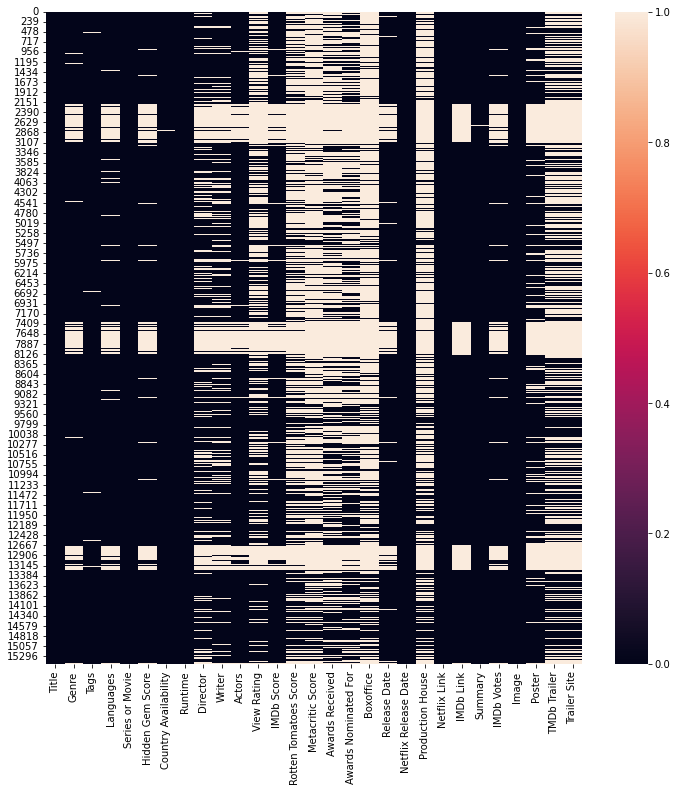

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.isna())

plt.show()

> - Như chúng ta có thể thấy có nhiều giá trị bị rỗng ở các phần, vì vậy nhóm tôi sẽ giữ lại các cột phù hợp và **xoá** đi các **cột** bị khuyết quá nhiều giá trị mà nhóm tôi cho rằng không phù hợp với bài phân tích của nhóm;

In [11]:
df = df.drop(columns = [ 'Metacritic Score', 'Boxoffice', 'Production House', 'Netflix Link', 'IMDb Link',
        'Poster', 'TMDb Trailer', 'Trailer Site'], axis = 1)

> - Nhóm tôi sẽ chuyển đổi 2 cột (**'Release Date'** và **'Netflix Release Date'**) về dạng **thời gian** phù hợp;

In [12]:
df['Release Date']= pd.to_datetime(df['Release Date'])
df['Netflix Release Date']= pd.to_datetime(df['Netflix Release Date'])

> - Đồng thời nhóm tôi sẽ thêm 2 cột về (**Released Year** và **Netflix Release Date**) để nhóm có thể phân tích phim theo năm;

In [13]:
df['Released_Year'] = pd.DatetimeIndex(df['Release Date']).year
df['Released_Year_Net'] = pd.DatetimeIndex(df['Netflix Release Date']).year

> - Và đây là **dataframe** sau khi chỉnh sửa của nhóm tôi.

In [14]:
df.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Image,Released_Year,Released_Year_Net
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,98.0,74.0,57.0,2008-12-12,2021-03-04,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0,2021


<a id="2"></a>
# **<center><span style="color:#00BFC4;">EDA</span></center>**

### Movie 🎥 vs Tv Series 📺

In [15]:
colors = ['black',] * 2
colors[0] = 'crimson'

fig_donut = px.pie(df, names='Series or Movie', height=300, width=700, hole=0.7, title='More Movie 🎥 or Tv Series 📺?',
                   color_discrete_sequence=colors)
fig_donut.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=90)
fig_donut.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                        plot_bgcolor='#333', paper_bgcolor='#333',
                        title_font=dict(size=45, color='#8a8d93', family="Lato, sans-serif"),
                        font=dict(size=17, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

----------------------------

> - Tách **Series or Movie** thành **Movie** và **Series**

In [16]:
df_movie = df[df['Series or Movie']=='Movie']
df_movie.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Image,Released_Year,Released_Year_Net
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,79.0,1.0,NaN,2020-05-08,2021-03-04,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,2020.0,2021


In [17]:
df_series = df[df["Series or Movie"] == "Series"]
df_series.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Image,Released_Year,Released_Year_Net
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,98.0,74.0,57.0,2008-12-12,2021-03-04,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0,2021


----------------------------

In [18]:
col = "Released_Year_Net"

vc1 = df_series[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = df_movie[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="orange"), )
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
data = [trace1, trace2]
fig_line = go.Figure(data)

fig_line.update_traces(hovertemplate=None)
fig_line.update_xaxes(showgrid=False)
fig_line.update_yaxes(showgrid=False)

large_title_format = 'Tv Show and Movies impact over the Year'
small_title_format = "<span style='font-size:13px; font-family:Tahoma'>Due to Covid updatation of content is slowed."
fig_line.update_layout(title=large_title_format + "<br>" + small_title_format, height=400,
                  margin=dict(t=130, b=0, l=70, r=40),
                  hovermode="x unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))

fig_line.add_annotation(dict(x=0.75, y=0.5, ax=0, ay=0,
                    xref = "paper", yref = "paper", 
                    text= "Highest number of <b>Tv Shows</b><br> were released in <b>2020</b><br>."
                  ))
fig_line.add_annotation(dict(x=0.85, y=1.1, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "Highest number of <b>Movies</b> were relased<br> in <b>2020</b>"
                  ))
fig_line.show()

### Genres ✨

> - Đối với TV series

In [19]:
df_series_gen = df_series.dropna(subset=['Genre'])

colors_10 = ['DarkRed', 'FireBrick','Red', 'Crimson', 'IndianRed', 'slategray', 'gray', 'dimgrey', 'DarkSlateGrey', 'black']
series_gen_list = df_series_gen.Genre.str.split(',') #split the list into names
s_gen_list = {} #create an empty list
for genres in series_gen_list: # for any names in series_gen_list
    for genre in genres: # for any genre in genres
        if (genre in s_gen_list): #if this genre is already present in the s_gen_list
            s_gen_list[genre]+=1 # increase his value
        else:  # else
            s_gen_list[genre]=1 # Create his index in the list
s_gen_df = pd.DataFrame(s_gen_list.values(),index = s_gen_list.keys(),
                        columns = {'Counts of Genres in Tv Series'}) #Create a s_gen_df
s_gen_df.sort_values(by = 'Counts of Genres in Tv Series',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_s_gen = s_gen_df[0:10]

fig1 = go.Figure(data=[go.Bar(
    x = top_10_s_gen.index,
    y = top_10_s_gen['Counts of Genres in Tv Series'],
    text = top_10_s_gen['Counts of Genres in Tv Series'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig1.update_layout(title_text= 'Which are the most popular genres in Tv Series?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Genres',
                  titlefont_size=14))

----------------------------

> - Đối với Movies

In [20]:
df_movie_gen = df_movie.dropna(subset=['Genre'])

movie_gen_list = df_movie_gen.Genre.str.split(', ') #split the list into names
m_gen_list = {} #create an empty list
for genres in movie_gen_list: # for any genres in movie_gen_list
    for genre in genres: # for any genre in genres
        if (genre in m_gen_list): #if this name is already present in the m_gen_list
            m_gen_list[genre]+=1 # increase his value
        else:  # else
            m_gen_list[genre]=1 # Create his index in the list
m_gen_df = pd.DataFrame(m_gen_list.values(),index = m_gen_list.keys(),
                        columns = {'Counts of Genres in Movies'}) #Create a m_gen_df
m_gen_df.sort_values(by = 'Counts of Genres in Movies',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_m_gen = m_gen_df[0:10]

fig2 = go.Figure(data=[go.Bar(
    x = top_10_m_gen.index,
    y = top_10_m_gen['Counts of Genres in Movies'],
    text = top_10_m_gen['Counts of Genres in Movies'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig2.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig2.update_layout(title_text= 'Which are the most popular genres in Movies?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Genres',
                  titlefont_size=14))

### Tags 📝 

> - Đối với TV series

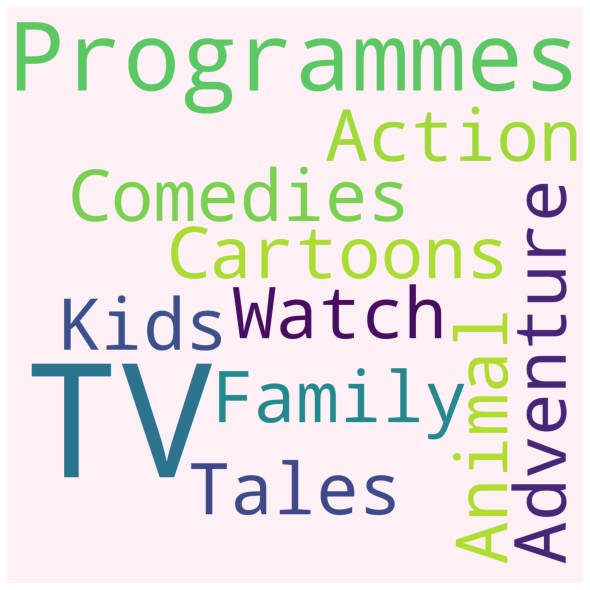

In [21]:
df_series_tag = df_series.dropna(subset=['Tags'])

nlp = spacy.load('en_core_web_sm')
series_tags = df_series_tag['Tags']
for tag in series_tags:
    doc = nlp(tag)
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]
rest_string = ' '
for i in words:
   rest_string = rest_string+i+' '
    
wordcloud1 = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 5).generate(rest_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

----------------------------

> - Đối với Movies

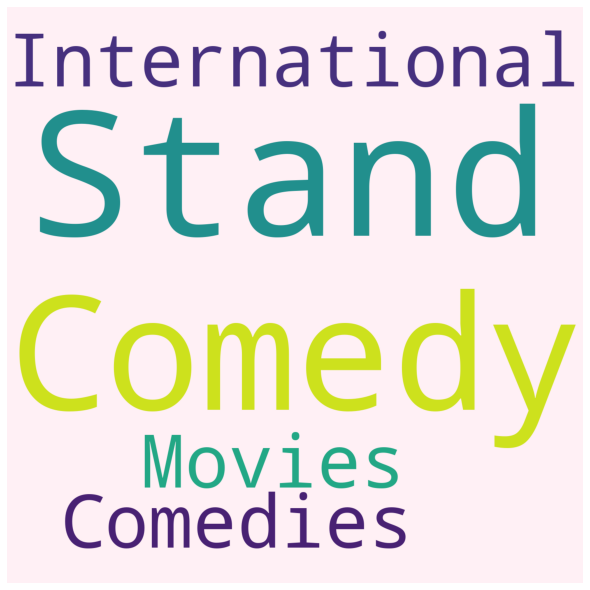

In [22]:
df_movie_tag = df_movie.dropna(subset=['Tags'])

nlp = spacy.load('en_core_web_sm')
movie_tags = df_movie_tag['Tags']
for tag in movie_tags:
    doc = nlp(tag)
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]
rest_string = ' '
for i in words:
   rest_string = rest_string+i+' '
    
wordcloud2 = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 5).generate(rest_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Languages 🗣️

> - Đối với TV series

In [23]:
df_series_lan = df_series.dropna(subset=['Languages'])

ax0= px.treemap(df_series_lan,path=["Languages"])
ax0.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



----------------------------

> - Đối với Movies

In [24]:
df_movie_lan = df_movie.dropna(subset=['Languages'])

ax1= px.treemap(df_movie_lan,path=["Languages"])
ax1.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Best Hidden Gems 💎

> - Đối với TV series

In [25]:
df_series_hdg = df_series.dropna(subset=['Hidden Gem Score'])
df_series_hdg = df_series_hdg.sort_values(by = 'Hidden Gem Score', ascending = False)
top_s_10_list = df_series_hdg[:10]
top_s_10_list.reset_index(drop=True, inplace=True)
print('The 10 Best Hidden Gems on Tv Series are:\n',top_s_10_list['Title'])

The 10 Best Hidden Gems on Tv Series are:
 0                 Flavours of Romania
1                 A Lion in the House
2                            Im Sorry
3                    Regiment Diaries
4                        Numberblocks
5                            Stranger
6                        The Lost Art
7                          Doble Kara
8                            Kopitiam
9    Aunty Donnas Big Ol House of Fun
Name: Title, dtype: object


----------------------------

> - Đối với Movies

In [26]:
df_movie_hdg = df_movie.dropna(subset=['Hidden Gem Score'])
df_movie_hdg = df_movie_hdg.sort_values(by = 'Hidden Gem Score', ascending = False)
top_m_10_list = df_movie_hdg[:10]
top_m_10_list.reset_index(drop=True, inplace=True)
print('The 10 Best Hidden Gems in Movies are:\n',top_m_10_list['Title'])

The 10 Best Hidden Gems in Movies are:
 0                             No Festival
1                         The Dream House
2                           Horsin Around
3                              Conspiracy
4                              Green Gold
5                                One Girl
6                        The Last Animals
7                         The Consuls Son
8                          Bye Bye London
9    Invisible Essence: The Little Prince
Name: Title, dtype: object


### Countries 🗺

> - Đối với TV series

In [27]:
df_series_ctr = df_series.dropna(subset=['Country Availability'])

series_ctr_list = df_series_ctr['Country Availability'].str.split(', ') #split the list into names
s_ctr_list = {} #create an empty list
for countries in series_ctr_list: # for any countries in series_ctr_list
    for country in countries: # for any country in countries
        if (country in s_ctr_list): #if this country is already present in the s_ctr_list
            s_ctr_list[country]+=1 # increase his value
        else:  # else
            s_ctr_list[country]=1 # Create his index in the list
s_ctr_df = pd.DataFrame(s_ctr_list.values(),index = s_ctr_list.keys(),
                        columns = {'Counts of Country Availability'}) #Create a s_ctr_df
s_ctr_df.sort_values(by = 'Counts of Country Availability',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_s_ctr = s_ctr_df[0:10]

fig3 = go.Figure(data=[go.Bar(
    x = top_10_s_ctr.index,
    y = top_10_s_ctr['Counts of Country Availability'],
    text = top_10_s_ctr['Counts of Country Availability'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig3.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig3.update_layout(title_text= 'Which countries have a larger Series Availability?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Countries',
                  titlefont_size=14))

----------------------------

> - Đối với Movies

In [28]:
df_movie_ctr = df_movie.dropna(subset=['Country Availability'])

movie_ctr_list = df_movie_ctr['Country Availability'].str.split(', ') #split the list into names
m_ctr_list = {} #create an empty list
for countries in movie_ctr_list: # for any countries in movie_ctr_list
    for country in countries: # for any country in countries
        if (country in m_ctr_list): #if this country is already present in the m_ctr_list
            m_ctr_list[country]+=1 # increase his value
        else:  # else
            m_ctr_list[country]=1 # Create his index in the list
m_ctr_df = pd.DataFrame(m_ctr_list.values(),index = m_ctr_list.keys(),
                        columns = {'Counts of Country Availability'}) #Create a m_ctr_df
m_ctr_df.sort_values(by = 'Counts of Country Availability',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_m_ctr = m_ctr_df[0:10]

fig4 = go.Figure(data=[go.Bar(
    x = top_10_m_ctr.index,
    y = top_10_m_ctr['Counts of Country Availability'],
    text = top_10_m_ctr['Counts of Country Availability'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig4.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig4.update_layout(title_text= 'Which countries have a larger Movie Availability?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Countries',
                  titlefont_size=14))

----------------------------

In [29]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
   
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['Country Availability'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict(data = data, layout = layout )
    iplot(fig, validate = False, filename = 'd3-world-map' )
    return country, fig

country_vals, fig_map = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig5 = go.Figure(data, layout=layout)
fig5.show()

### Duration ⏳

> - Đối với Series

In [30]:
df_series_drt = df_series.dropna(subset=['Runtime'])
df_series_drt['Runtime'].value_counts()

< 30 minutes    3782
Name: Runtime, dtype: int64

----------------------------

> - Đối với Movies

In [31]:
df_movie_drt = df_movie.dropna(subset=['Runtime'])

count_d = df_movie_drt['Runtime'].value_counts()
fig6 = go.Figure(data=[go.Bar(
    x = count_d.index,
    y = count_d,
    text = count_d,
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig6.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig6.update_layout(title_text= 'What is the average duration of a movie on Netflix?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Duration',
                  titlefont_size=14))

----------------------------

In [32]:
fig_box = px.box(df, x='Runtime', title='Boxplot', height=250, color_discrete_sequence=['#b20710'])
fig_box.update_xaxes(showgrid=False)
fig_box.update_yaxes(showgrid=False)
fig_box.update_traces(hovertemplate=None)
fig_box.update_layout(margin=dict(t=80, b=20, l=50, r=50),
                      xaxis_title=' ', yaxis_title=" ",
                      plot_bgcolor='#333', paper_bgcolor='#333',
                      title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                      font=dict(color='#8a8d93'))

### Directors 🎬 and actors 🤵

#### Directors 🎬

> - Đối với TV series

In [33]:
df_series_dir = df_series.dropna(subset=['Director'])

series_dir_list = df_series_dir['Director'].str.split(', ') #split the list into names
s_dir_list = {} #create an empty list
for directors in series_dir_list: # for any countries in series_ctr_list
    for director in directors: # for any country in countries
        if (director in s_dir_list): #if this country is already present in the s_ctr_list
            s_dir_list[director]+=1 # increase his value
        else:  # else
            s_dir_list[director]=1 # Create his index in the list
s_dir_df = pd.DataFrame(s_dir_list.values(),index = s_dir_list.keys(),
                        columns = {'Director Counts'}) #Create a s_ctr_df
s_dir_df.sort_values(by = 'Director Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_s_dir = s_dir_df[0:10]

fig7 = go.Figure(data=[go.Bar(
    x = top_10_s_dir.index,
    y = top_10_s_dir['Director Counts'],
    text = top_10_s_dir['Director Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig7.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig7.update_layout(title_text= 'Which are the directors that have directed more Tv Series?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of Tv Series he/she directed',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Directors',
                  titlefont_size=14))

----------------------------

> - Đối với Movies

In [34]:
df_movie_dir = df_movie.dropna(subset=['Director'])

movie_dir_list = df_movie_dir['Director'].str.split(', ') #split the list into names
m_dir_list = {} #create an empty list
for directors in movie_dir_list: # for any countries in series_ctr_list
    for director in directors: # for any country in countries
        if (director in m_dir_list): #if this country is already present in the s_ctr_list
            m_dir_list[director]+=1 # increase his value
        else:  # else
            m_dir_list[director]=1 # Create his index in the list
m_dir_df = pd.DataFrame(m_dir_list.values(),index = m_dir_list.keys(),
                        columns = {'Director Counts'}) #Create a s_ctr_df
m_dir_df.sort_values(by = 'Director Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_m_dir = m_dir_df[0:10]

fig8 = go.Figure(data=[go.Bar(
    x = top_10_m_dir.index,
    y = top_10_m_dir['Director Counts'],
    text = top_10_m_dir['Director Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig8.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig8.update_layout(title_text= 'Which are the directors that have directed more Movies?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of Movies he/she directed',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Directors',
                  titlefont_size=14))

#### Actors 🤵 

> - Đối với TV series

In [35]:
df_series_act = df_series.dropna(subset=['Actors'])

series_act_list = df_series_act['Actors'].str.split(', ') #split the list into names
s_act_list = {} #create an empty list
for actors in series_act_list: # for any countries in series_ctr_list
    for actor in actors: # for any country in countries
        if (actor in s_act_list): #if this country is already present in the s_ctr_list
            s_act_list[actor]+=1 # increase his value
        else:  # else
            s_act_list[actor]=1 # Create his index in the list
s_act_df = pd.DataFrame(s_act_list.values(),index = s_act_list.keys(),
                        columns = {'Actor Counts'}) #Create a s_ctr_df
s_act_df.sort_values(by = 'Actor Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_s_act = s_act_df[0:10] 

fig9 = go.Figure(data=[go.Bar(
    x = top_10_s_act.index,
    y = top_10_s_act['Actor Counts'],
    text = top_10_s_act['Actor Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig9.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig9.update_layout(title_text= 'Which are the actors that have played more Tv Series?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of Tv Series he/she played',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Actors',
                  titlefont_size=14))

----------------------------

> - Đối với Movies

In [36]:
df_movie_act = df_movie.dropna(subset=['Actors'])

movie_act_list = df_movie_act['Actors'].str.split(', ') #split the list into names
m_act_list = {} #create an empty list
for actors in movie_act_list: # for any countries in series_ctr_list
    for actor in actors: # for any country in countries
        if (actor in m_act_list): #if this country is already present in the s_ctr_list
            m_act_list[actor]+=1 # increase his value
        else:  # else
            m_act_list[actor]=1 # Create his index in the list
m_act_df = pd.DataFrame(m_act_list.values(),index = m_act_list.keys(),
                        columns = {'Actor Counts'}) #Create a s_ctr_df
m_act_df.sort_values(by = 'Actor Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_m_act = m_act_df[0:10] 

fig10 = go.Figure(data=[go.Bar(
    x = top_10_m_act.index,
    y = top_10_m_act['Actor Counts'],
    text = top_10_m_act['Actor Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig10.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig10.update_layout(title_text= 'Which are the actors that have played more Movies?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of Movies he/she played',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Actors',
                  titlefont_size=14))

- **Top Actors on Netflix with Most TV Shows**

In [37]:
def country_trace(country, flag = "movie"):
    df["from_us"] = df['Country Availability'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["Runtime"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['Actors'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig11 = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig11.add_trace(traces[0], 1,1)
fig11.add_trace(traces[1], 1,3)
fig11.add_trace(traces[2], 1,5)
fig11.add_trace(traces[3], 2,1)
fig11.add_trace(traces[4], 2,3)
fig11.add_trace(traces[5], 2,5)

fig11.update_layout(height=1200, showlegend=False)
fig11.show()

### Tv Series 📺 and Movie 📽‍️ Charts by Rotten Tomatoes and IMDb

> - Đối với TV series

- IMDb

In [38]:
df_series_imdb = df_series.dropna(subset=['IMDb Score'])
df_series_imdb = df_series_imdb.sort_values(by = 'IMDb Score', ascending = False)
top_s_imdb_10_list = df_series_imdb[:10]

fig12 = go.Figure(data=[go.Bar(
    x = top_s_imdb_10_list['Title'],
    y = top_s_imdb_10_list['IMDb Score'],
    text = top_s_imdb_10_list['IMDb Score'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig12.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig12.update_layout(title_text= 'Which are the most rated Tv Series for IMDb?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='IMDb Score',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

- Rotten Tomatoes

In [39]:
df_series_rt = df_series.dropna(subset=['Rotten Tomatoes Score'])
df_series_rt = df_series_rt.sort_values(by = 'Rotten Tomatoes Score', ascending = False)
top_s_rt_10_list = df_series_rt[:10]

fig13 = go.Figure(data=[go.Bar(
    x = top_s_rt_10_list['Title'],
    y = top_s_rt_10_list['Rotten Tomatoes Score'],
    text = top_s_rt_10_list['Rotten Tomatoes Score'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig13.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig13.update_layout(title_text= 'Which are the most rated Tv Series for Rotten Tomatoes?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Rotten Tomatoes Score',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

----------------------------

> - Đối với Movies

- IMDb

In [40]:
df_movie_imdb = df_movie.dropna(subset=['IMDb Score'])
df_movie_imdb = df_movie_imdb.sort_values(by = 'IMDb Score', ascending = False)
top_m_imdb_10_list = df_movie_imdb[:10]

fig14 = go.Figure(data=[go.Bar(
    x = top_m_imdb_10_list['Title'],
    y = top_m_imdb_10_list['IMDb Score'],
    text = top_m_imdb_10_list['IMDb Score'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig14.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig14.update_layout(title_text= 'Which are the most rated Movies for IMDb?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='IMDb Score',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

- Rotten Tomatoes

In [41]:
df_movie_rt = df_movie.dropna(subset=['Rotten Tomatoes Score'])
df_movie_rt = df_movie_rt.sort_values(by = 'Rotten Tomatoes Score', ascending = False)
top_m_rt_10_list = df_movie_rt[:10]

fig15 = go.Figure(data=[go.Bar(
    x = top_m_rt_10_list['Title'],
    y = top_m_rt_10_list['Rotten Tomatoes Score'],
    text = top_m_rt_10_list['Rotten Tomatoes Score'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig15.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig15.update_layout(title_text= 'Which are the most rated Movies for Rotten Tomatoes?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Rotten Tomatoes Score',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

### Top 15 Tv Series and Movie for awards received 🏆

> - Đối với TV series

In [42]:
df_series_awr = df_series.dropna(subset=['Awards Received'])
df_series_awr = df_series_awr.sort_values(by = 'Awards Received', ascending = False)
top_s_awr_15_list = df_series_awr[:15]

colors_15 = ['DarkRed', 'FireBrick', 'FireBrick' ,'Red', 'Crimson', 'Crimson', 'IndianRed' , 'slategray', 'slategray' , 'gray' , 'gray', 'dimgrey', 'dimgrey', 'DarkSlateGrey', 'black']
fig16 = go.Figure(data=[go.Bar(
    x = top_s_awr_15_list['Title'],
    y = top_s_awr_15_list['Awards Received'],
    text = top_s_awr_15_list['Awards Received'],
    textposition='auto',
    marker_color=colors_15 # marker color can be a single color value or an iterable
)])
fig16.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig16.update_layout(title_text= 'Which are the 15 TV series 📺 that have received the most awards?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Awards Received',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

----------------------------

> - Đối với Movies

In [43]:
df_movie_awr = df_movie.dropna(subset=['Awards Received'])
df_movie_awr = df_movie_awr.sort_values(by = 'Awards Received', ascending = False)
top_m_awr_15_list = df_movie_awr[:15]

fig17 = go.Figure(data=[go.Bar(
    x = top_m_awr_15_list['Title'],
    y = top_m_awr_15_list['Awards Received'],
    text = top_m_awr_15_list['Awards Received'],
    textposition='auto',
    marker_color=colors_15 # marker color can be a single color value or an iterable
)])
fig17.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig17.update_layout(title_text= 'Which are the 15 Movies 📽‍️ that have received the most awards?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Awards Received',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

### Productivity per year (on Netflix) 📆 

> - Đối với TV series

In [44]:
df_series_rel = df_series.dropna(subset=['Released_Year_Net'])

series_rel_list = df_series_act['Released_Year_Net']
s_rel_list = {} #create an empty list
for year in series_rel_list: # for any year in series_rel_list
    if (year in s_rel_list): #if this year is already present in the s_rel_list
        s_rel_list[year]+=1 # increase his value
    else:  # else
        s_rel_list[year]=1 # Create his index in the list
s_rel_df = pd.DataFrame(s_rel_list.values(),index = s_rel_list.keys(),
                        columns = {'Year Counts'}) #Create a s_ctr_df
s_rel_df.sort_values(by = 'Year Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_s_rel = s_rel_df[0:10] 

fig18 = go.Figure(data=[go.Bar(
    x = top_10_s_rel.index,
    y = top_10_s_rel['Year Counts'],
    text = top_10_s_rel['Year Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig18.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig18.update_layout(title_text= 'In which year there have been more Tv Series released ?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of release',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

----------------------------

> - Đối với Movies

In [45]:
df_movie_rel = df_movie.dropna(subset=['Released_Year_Net'])

movie_rel_list = df_movie_act['Released_Year_Net']
m_rel_list = {} #create an empty list
for year in movie_rel_list: # for any year in movie_rel_list
    if (year in m_rel_list): #if this year is already present in the m_rel_list
        m_rel_list[year]+=1 # increase his value
    else:  # else
        m_rel_list[year]=1 # Create his index in the list
m_rel_df = pd.DataFrame(m_rel_list.values(),index = m_rel_list.keys(),
                        columns = {'Year Counts'}) #Create a s_ctr_df
m_rel_df.sort_values(by = 'Year Counts',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_m_rel = m_rel_df[0:10] 

fig19 = go.Figure(data=[go.Bar(
    x = top_10_m_rel.index,
    y = top_10_m_rel['Year Counts'],
    text = top_10_m_rel['Year Counts'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig19.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig19.update_layout(title_text= 'In which year there have been more Movies released ?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='N° of release',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Titles',
                  titlefont_size=14))

[🔝](#0)

<a id="3"></a>
# **<center><span style="color:#00BFC4;">VALIDATION</span></center>**

In [46]:
type = list(df['Series or Movie'].unique())
criteria = ['Movies vs Tv series', 'Genres', 'Tags', 'Languages', 'Best Hidden Gems', 'Countries', 'Duration', 'Directors', 'Actors', 'IMDb Score', 'Rotten Tomatoes Score', 'Top 15', 'Productivity per year']

typehaveboth = type.copy()
typehaveboth.append('Both')

def plot_chart_distribution(criteria, type):
    if type == 'Both':
        if criteria == 'Movies vs Tv series':
            fig_donut.show()
            fig_line.show()
            return fig_donut, fig_line
        elif criteria == 'Genres':
            fig1.show()
            fig2.show()
            return fig1, fig2
        elif criteria == 'Tags':
            plt.imshow(wordcloud1)
            plt.show()
            plt.imshow(wordcloud2)
            plt.show()
        elif criteria == 'Languages':
            ax0.show()
            ax1.show()
            return ax0, ax1
        elif criteria == 'Best Hidden Gems':
            print('\nThe 10 Best Hidden Gems on Tv Series are:\n',top_s_10_list['Title'])
            print('\nThe 10 Best Hidden Gems on Tv Series are:\n',top_m_10_list['Title'])
        elif criteria == 'Countries':
            fig3.show()
            fig4.show()
            iplot(fig_map, validate = False, filename = 'd3-world-map')
            fig5.show()
            return fig3, fig4, fig5
        elif criteria == 'Duration':
            print(df_series_drt['Runtime'].value_counts())
            fig6.show()
            fig_box.show()
            return fig6, fig_box
        elif criteria == 'Directors':
            fig7.show()
            fig8.show()
            return fig7, fig8
        elif criteria == 'Actors':
            fig9.show()
            fig10.show()
            fig11.show()
            return fig9, fig10, fig11
        elif criteria == 'IMDb Score':
            fig12.show()
            fig14.show()
            return fig12, fig14
        elif criteria == 'Rotten Tomatoes Score':
            fig13.show()
            fig15.show()
            return fig13, fig15
        elif criteria == 'Top 15':
            fig16.show()
            fig17.show()
            return fig16, fig17
        elif criteria == 'Productivity per year':
            fig18.show()
            fig19.show()
            return fig18, fig19
    elif type == 'Series':
        if criteria == 'Movies vs Tv series':
            fig_donut.show()
            fig_line.show()
            return fig_donut, fig_line
        elif criteria == 'Genres':
            fig1.show()
            return fig1
        elif criteria == 'Tags':
            plt.imshow(wordcloud1)
            plt.show()
        elif criteria == 'Languages':
            ax0.show()
            return ax0
        elif criteria == 'Best Hidden Gems':
            print('\nThe 10 Best Hidden Gems on Tv Series are:\n',top_s_10_list['Title'])
        elif criteria == 'Countries':
            fig3.show()
            return fig3
        elif criteria == 'Duration':
            print(df_series_drt['Runtime'].value_counts())
        elif criteria == 'Directors':
            fig7.show()
            return fig7
        elif criteria == 'Actors':
            fig9.show()
            return fig9
        elif criteria == 'IMDb Score':
            fig12.show()
            return fig12
        elif criteria == 'Rotten Tomatoes Score':
            fig13.show()
            return fig13
        elif criteria == 'Top 15':
            fig16.show()
            return fig16
        elif criteria == 'Productivity per year':
            fig18.show()
            return fig18
    else:
        if criteria == 'Movies vs Tv series':
            fig_donut.show()
            fig_line.show()
            return fig_donut, fig_line
        elif criteria == 'Genres':
            fig2.show()
            return fig2
        elif criteria == 'Tags':
            plt.imshow(wordcloud2)
            plt.show()
        elif criteria == 'Languages':
            ax1.show()
            return ax1
        elif criteria == 'Best Hidden Gems':
            print('\nThe 10 Best Hidden Gems on Tv Series are:\n',top_m_10_list['Title'])
        elif criteria == 'Countries':
            fig4.show()
            return fig4
        elif criteria == 'Duration':
            fig6.show()
            return fig6
        elif criteria == 'Directors':
            fig8.show()
            return fig8
        elif criteria == 'Actors':
            fig10.show()
            return fig10
        elif criteria == 'IMDb Score':
            fig14.show()
            return fig14
        elif criteria == 'Rotten Tomatoes Score':
            fig15.show()
            return fig15
        elif criteria == 'Top 15':
            fig17.show()
            return fig17
        elif criteria == 'Productivity per year':
            fig19.show()
            return fig19


criteriadist = widgets.Dropdown(options=criteria, value=criteria[0],
                        description='Criteria:',
                        style={'description_width': 'initial'})

typedist = widgets.Dropdown(options=typehaveboth, value=type[0],
                        description='Type:',
                        style={'description_width': 'initial'})

showdist = widgets.interactive_output(plot_chart_distribution, {'criteria':criteriadist, 'type':typedist})
line = widgets.HBox([criteriadist, typedist])
box = widgets.VBox([showdist])
display(widgets.VBox([line, box]))

[🔝](#0)

<a id="4"></a>
# **<center><span style="color:#00BFC4;">Feature Extraction </span></center>**

[🔝](#0)

<a id="5"></a>
# **<center><span style="color:#00BFC4;">BESIDE</span></center>**

### Tại sao sự phụ thuộc vào dữ liệu của Netflix lại là một vấn đề đối với các quyết định sáng tạo?

> Giống như nhiều người trong số các bạn, tôi đã quá mệt mỏi với Netflix. Không phải Netflix không tạo ra nội dung hay mà là bởi vì họ có, nhưng họ cũng tạo ra rất nhiều phim lẻ và phim bộ rất rất giống nhau. Tôi cũng sợ bắt đầu một loạt phim mới, bởi vì ai biết liệu Netflix có “bật đèn xanh” cho một mùa khác hay không sau khi dữ liệu không hỗ trợ quyết định tài chính và sáng tạo. 
Dịch vụ phát trực tuyến tự gọi mình là “một công ty dựa trên dữ liệu kể từ khi thành lập”, vì vậy Netflix kiên định với triết lý dựa trên dữ liệu của mình. Thật không may, dữ liệu đó đã trở thành một vấn đề đối với các nhà làm phim, giám đốc điều hành sáng tạo và khán giả. 
Để hiểu đầy đủ tác động của việc phụ thuộc vào dữ liệu của Netflix, chúng ta phải phân tích cách thức và lý do gã khổng lồ phát trực tuyến sử dụng triết lý ưu tiên phân tích.

----------------------------

### Chúng ta học được gì?

> - Các tổ chức và doanh nghiệp có nên thu thập dữ liệu số và cá nhân hóa trải nghiệm khách hàng không? Câu trả lời chắc chắn là có.
> - Tuy nhiên dữ liệu hóa không chỉ là về dữ liệu, mà nó còn liên quan trực tiếp đến rất nhiều công cụ và công nghệ hỗ trợ thu thập dữ liệu, từ đó đặt ra yêu cầu và thách thức lớn cho doanh nghiệp.
> - Cá nhân hóa và tiếp thị dựa trên dữ liệu là 2 trong số 10 xu hướng digital marketing năm 2020 do các chuyên gia cấp cao của Google nhận định. Trong một vài năm tới, không tổ chức, doanh nghiệp nào có thể hoạt động nếu không khai thác dữ liệu. Do đó, chúng ta cần đối mặt với việc thu thập và sử dụng nguồn dữ liệu sẵn có của mình.
> - Một trong những dữ liệu mà bạn có thể thu thập ngay ở thời điểm hiện tại là: thông tin khách hàng, sở thích, thói quen… của họ. Đây chính là những thông tin liên quan đến insight khách hàng mà Marketers hàng ngày đã và đang nghiên cứu, khai thác.

----------------------------

[🔝](#0)